In [126]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [128]:
# Load the dataset
file_path = 'day.csv'  # Update this path to the location of your dataset
data = pd.read_csv(file_path)

In [129]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [130]:
data.shape

(730, 16)

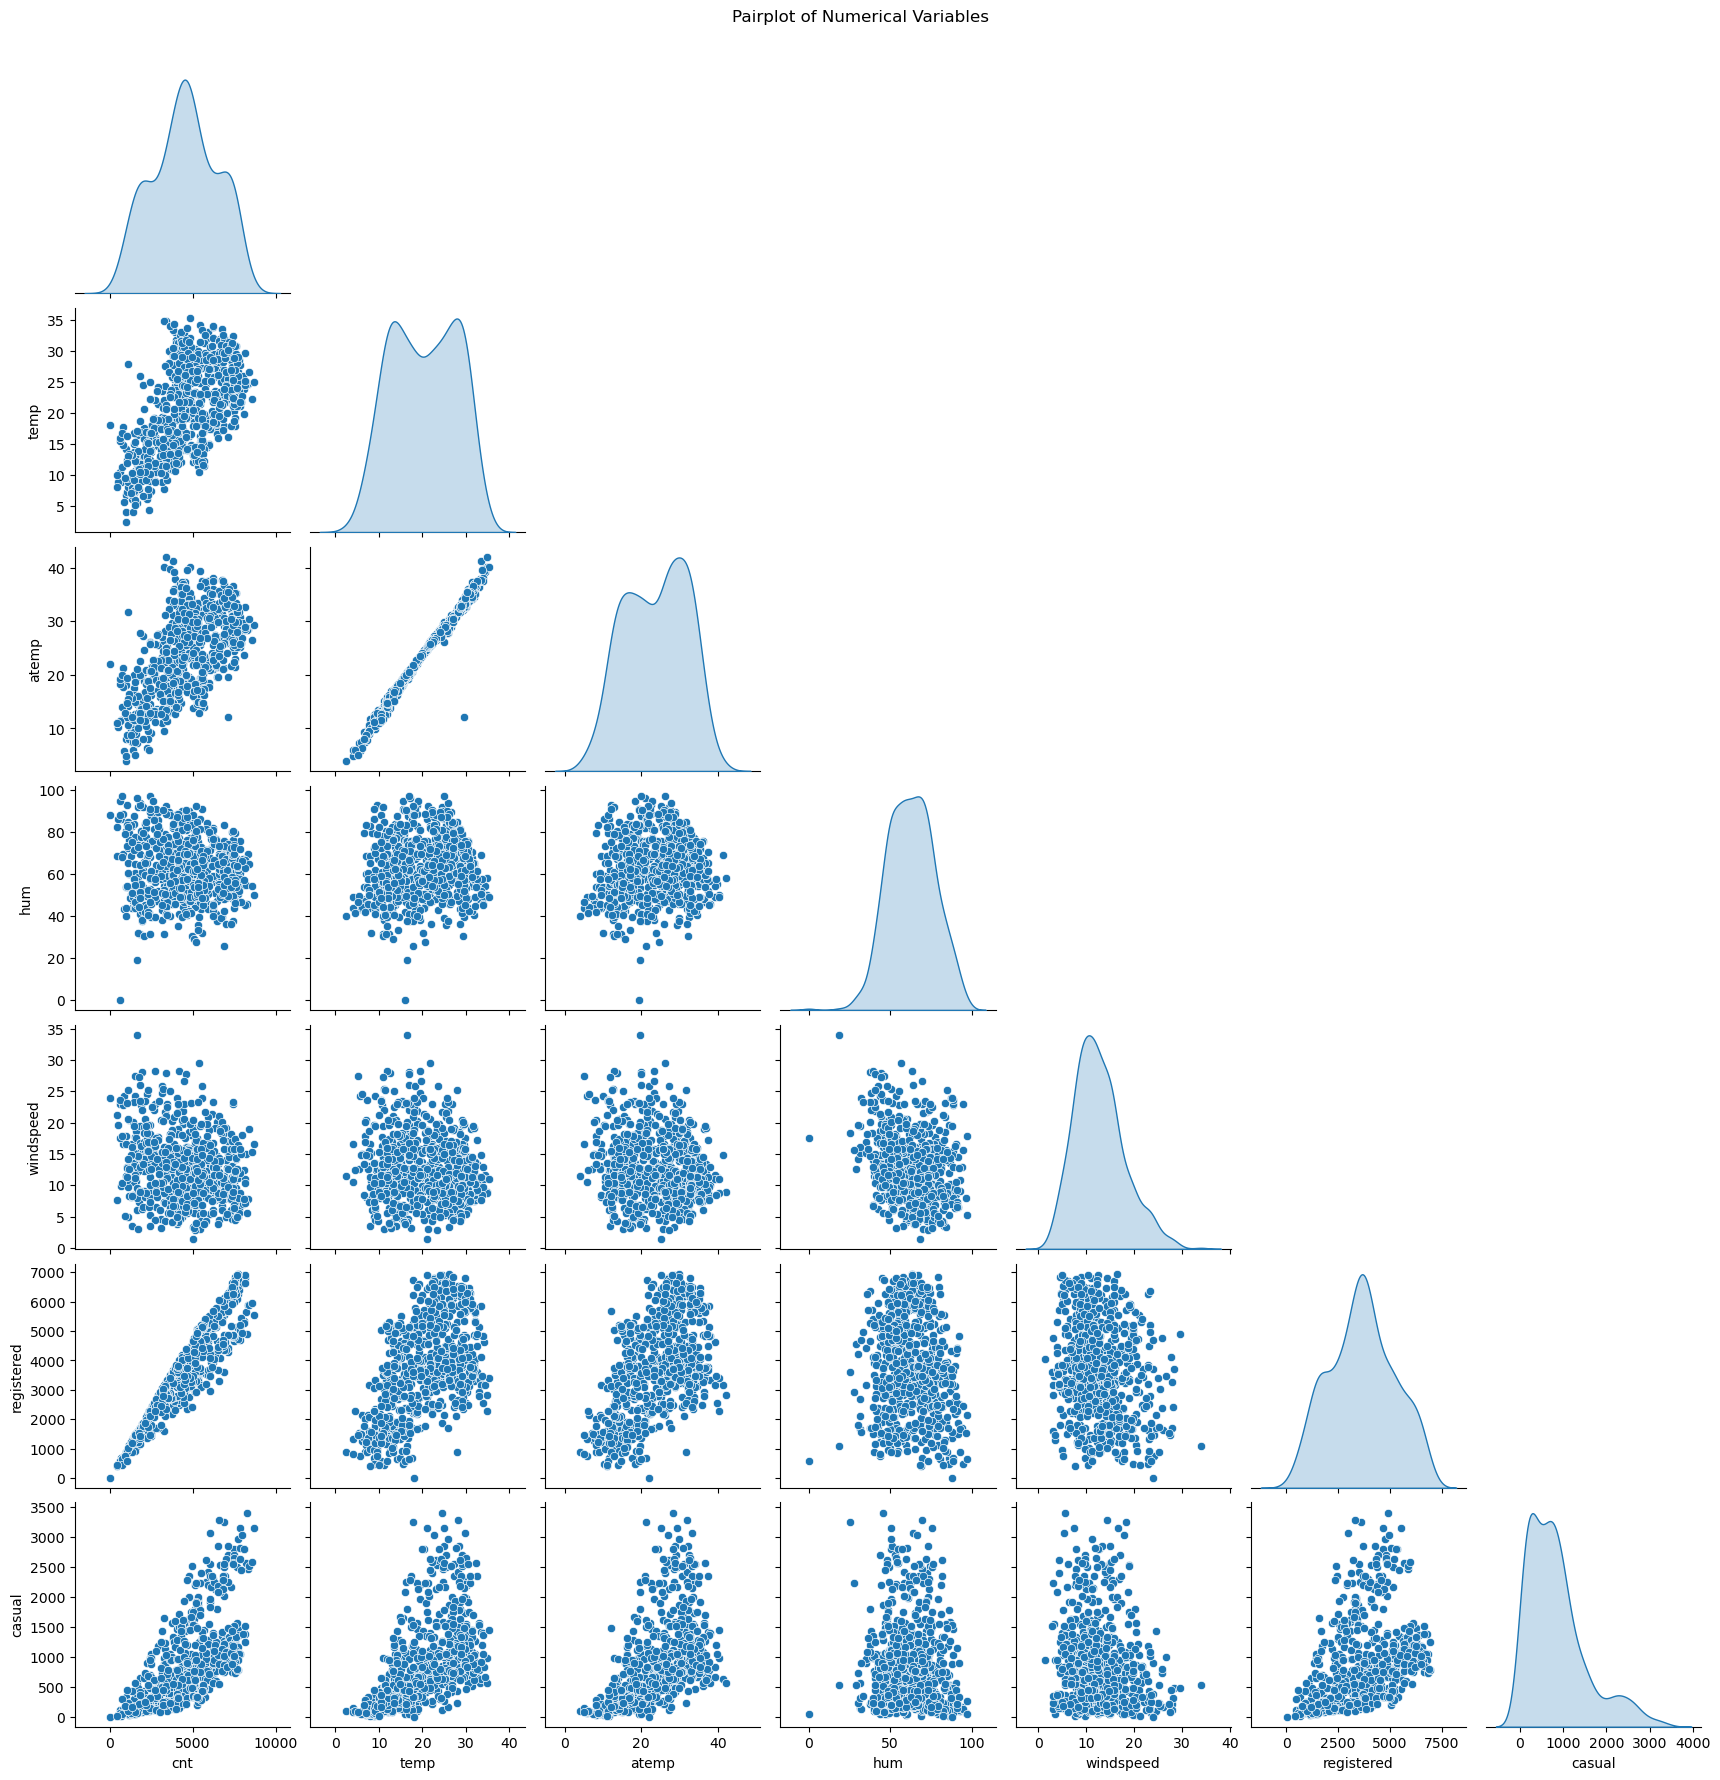

In [132]:
# Select numerical columns for the pairplot
numerical_columns = ['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'registered', 'casual']

# Create pairplot
sns.pairplot(data[numerical_columns], diag_kind='kde', kind='scatter', corner=True)
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

In [133]:
# Encode the season and weathersit columns since they're categorical
data = pd.get_dummies(data, columns=['season', 'weathersit'], drop_first=True)

In [134]:
# Drop unnecessary columns
data_clean = data.drop(columns=['casual', 'registered', 'dteday'])

In [135]:
# Separate target and features
X = data_clean.drop(columns=['cnt'])
y = data_clean['cnt']

In [136]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [138]:
# Make predictions on test
y_pred = model.predict(X_test)

In [139]:
# Evaluate the coefficients of each feature
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
         Feature  Coefficient
1             yr  4516.629956
11      season_4  1782.444927
9       season_2  1219.237350
10      season_3   972.443821
2           mnth   181.738512
5     workingday   138.749299
6           temp   124.661126
4        weekday    67.998503
0        instant    -6.923106
7            hum    -9.903034
8      windspeed   -42.326210
12  weathersit_2  -450.785336
3        holiday  -501.786532
13  weathersit_3 -2103.350680


In [140]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.85


In [141]:
r2_score(y_test, y_pred)

0.8525215893170413